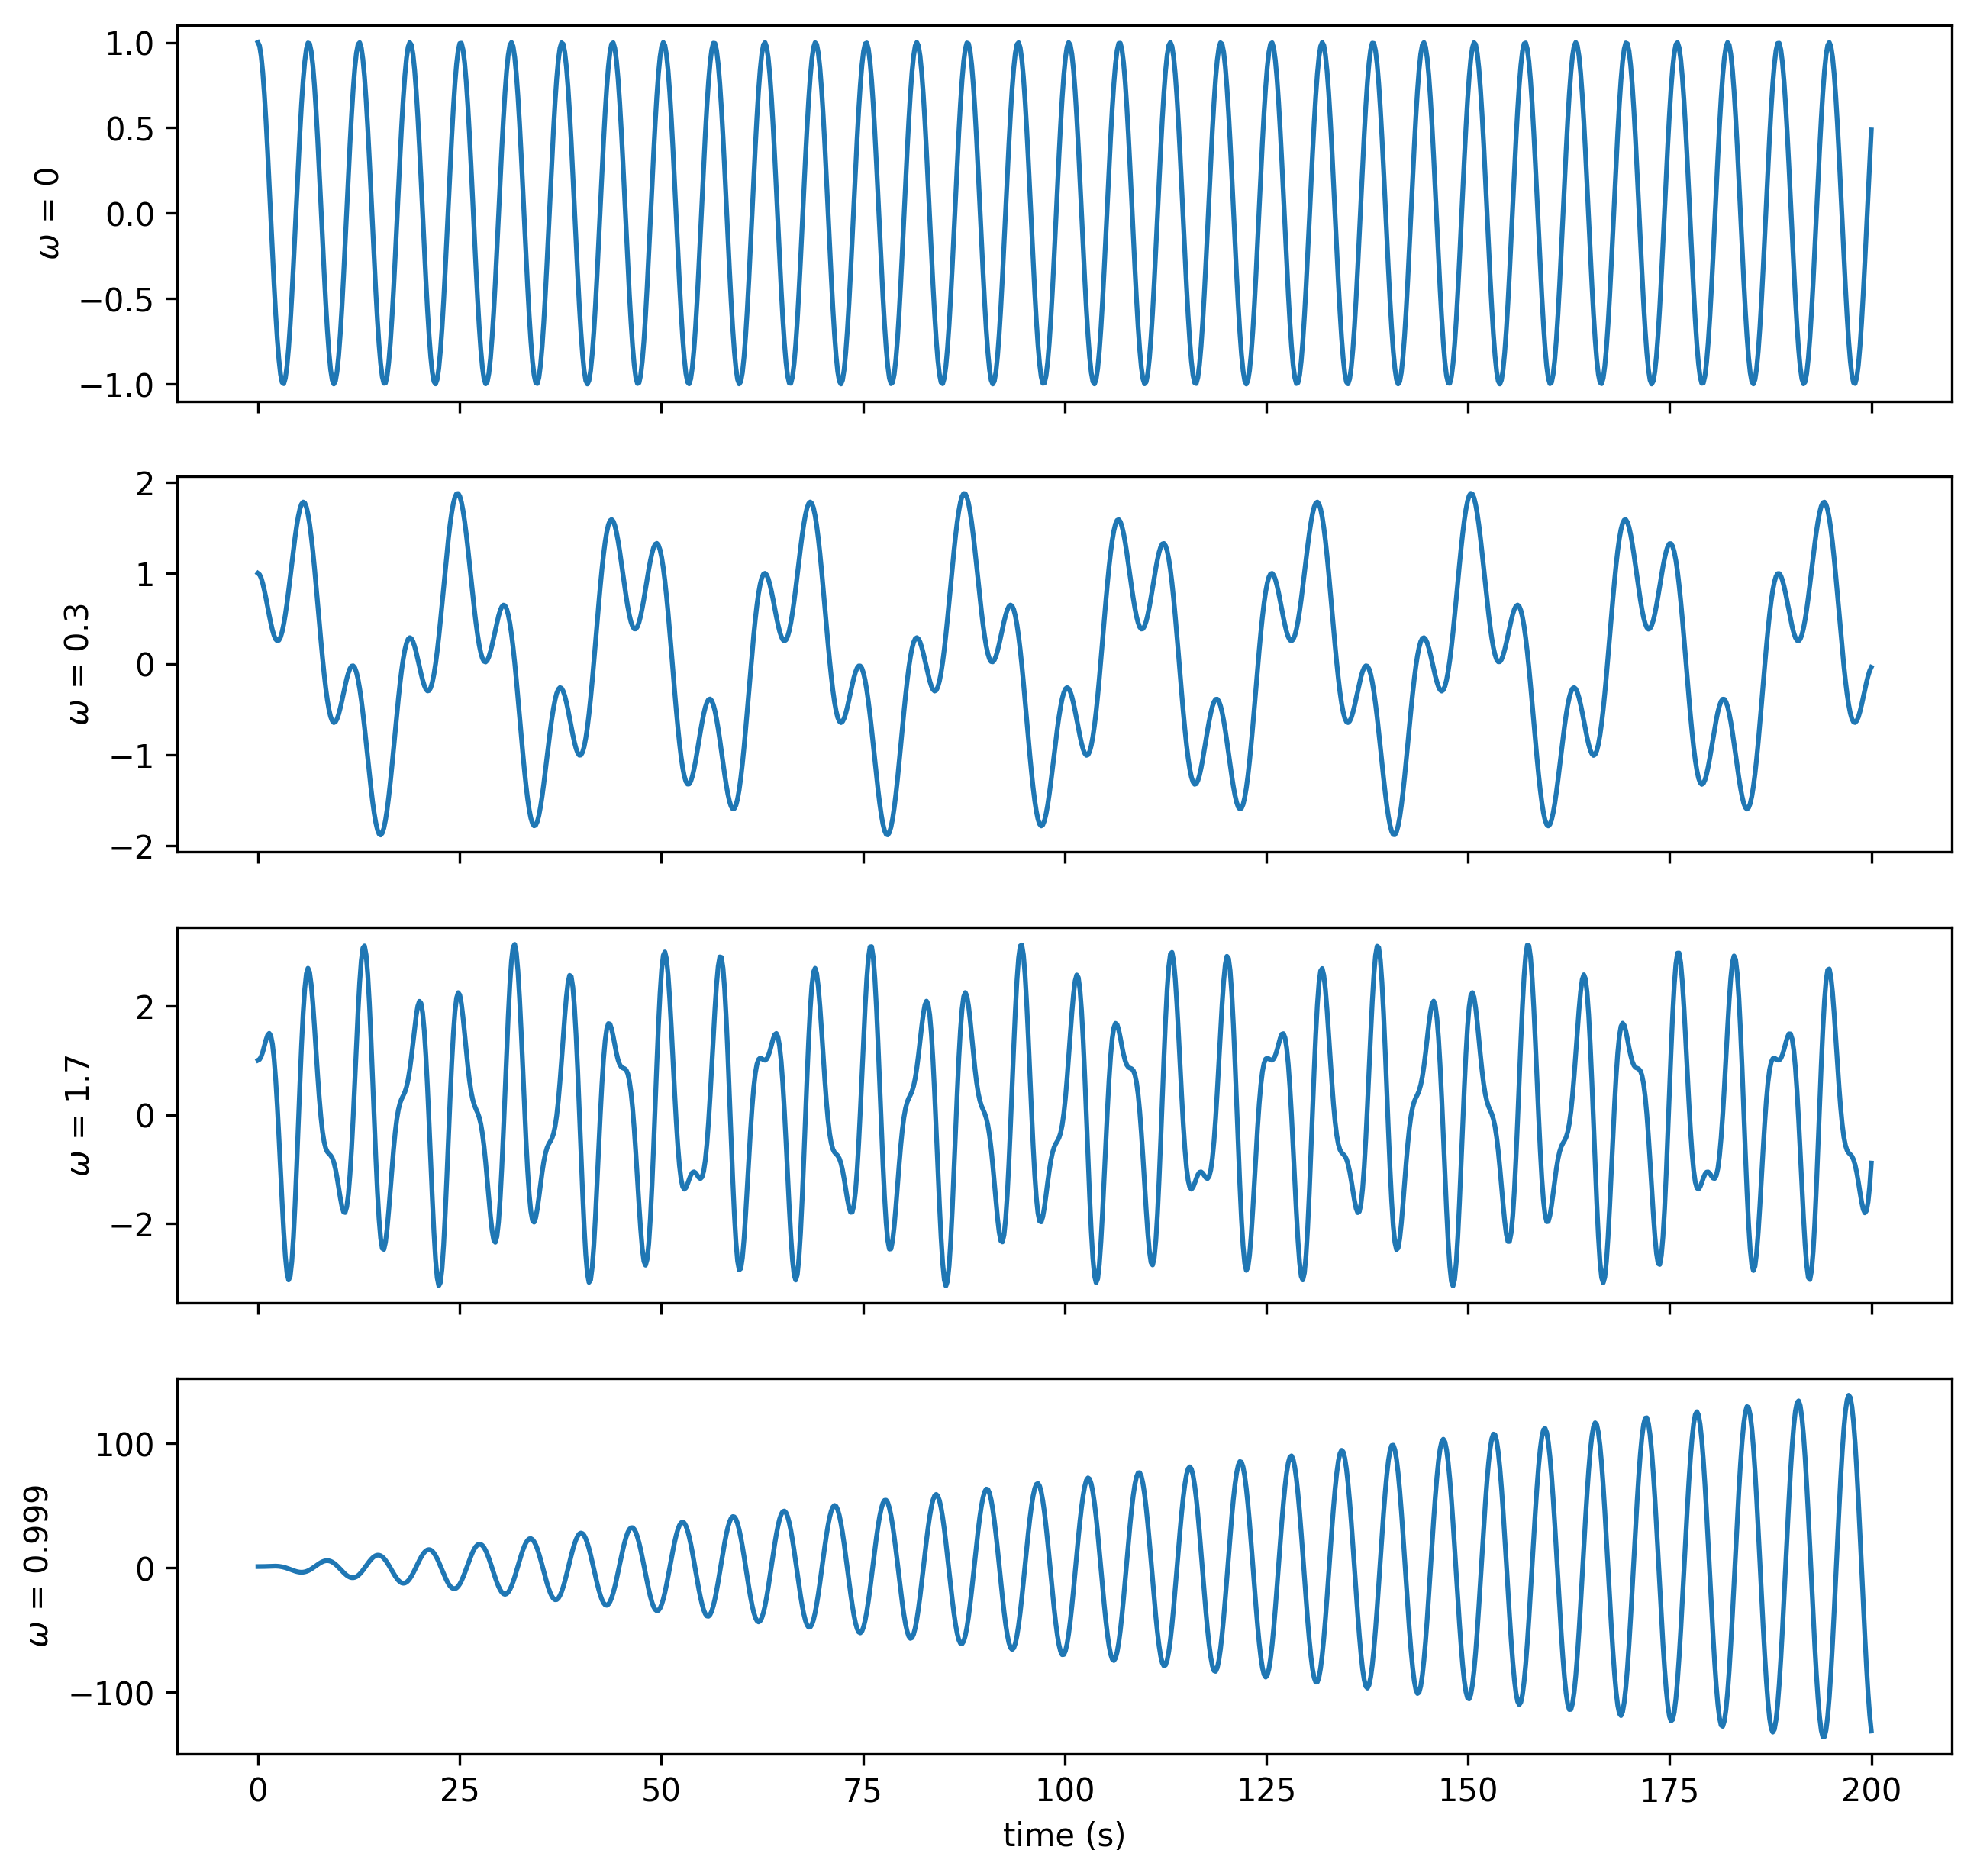

In [2]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

rcParams['figure.dpi'] = 300

# define the differential equation in the form of F=Ax+b
def F(x, t, k, m, F_0 = 0, w = 0): 
    A = [[0, 1], [-k/m, 0]]
    b = F_0*np.sin(w*t)
    return np.dot(A,x) + b

k   = 1 # N/m
m   = 1 # kg
x_0 = [1, 0] # [m, m/s]
w_0 = np.sqrt(k/m) # Hz
t   = np.linspace(0, 200, 1000) # s
F_0 = 1
ws  = [0, .3*w_0, 1.7*w_0, .999*w_0] # Hz

# build figure window
fig, axes = plt.subplots(4, 1, sharex = True, figsize = (10,10))

for ax, w in zip(axes, ws):
    # solve the differential equation using odeint
    x = odeint(F, x_0, t, args = (k, m, F_0, w))
    
    # plot just the displacement vs time
    ax.plot(t, x[:,0])
    ax.set_ylabel(r'$\omega$ = {:g}'.format(w))

axes[-1].set_xlabel('time (s)')

plt.show()

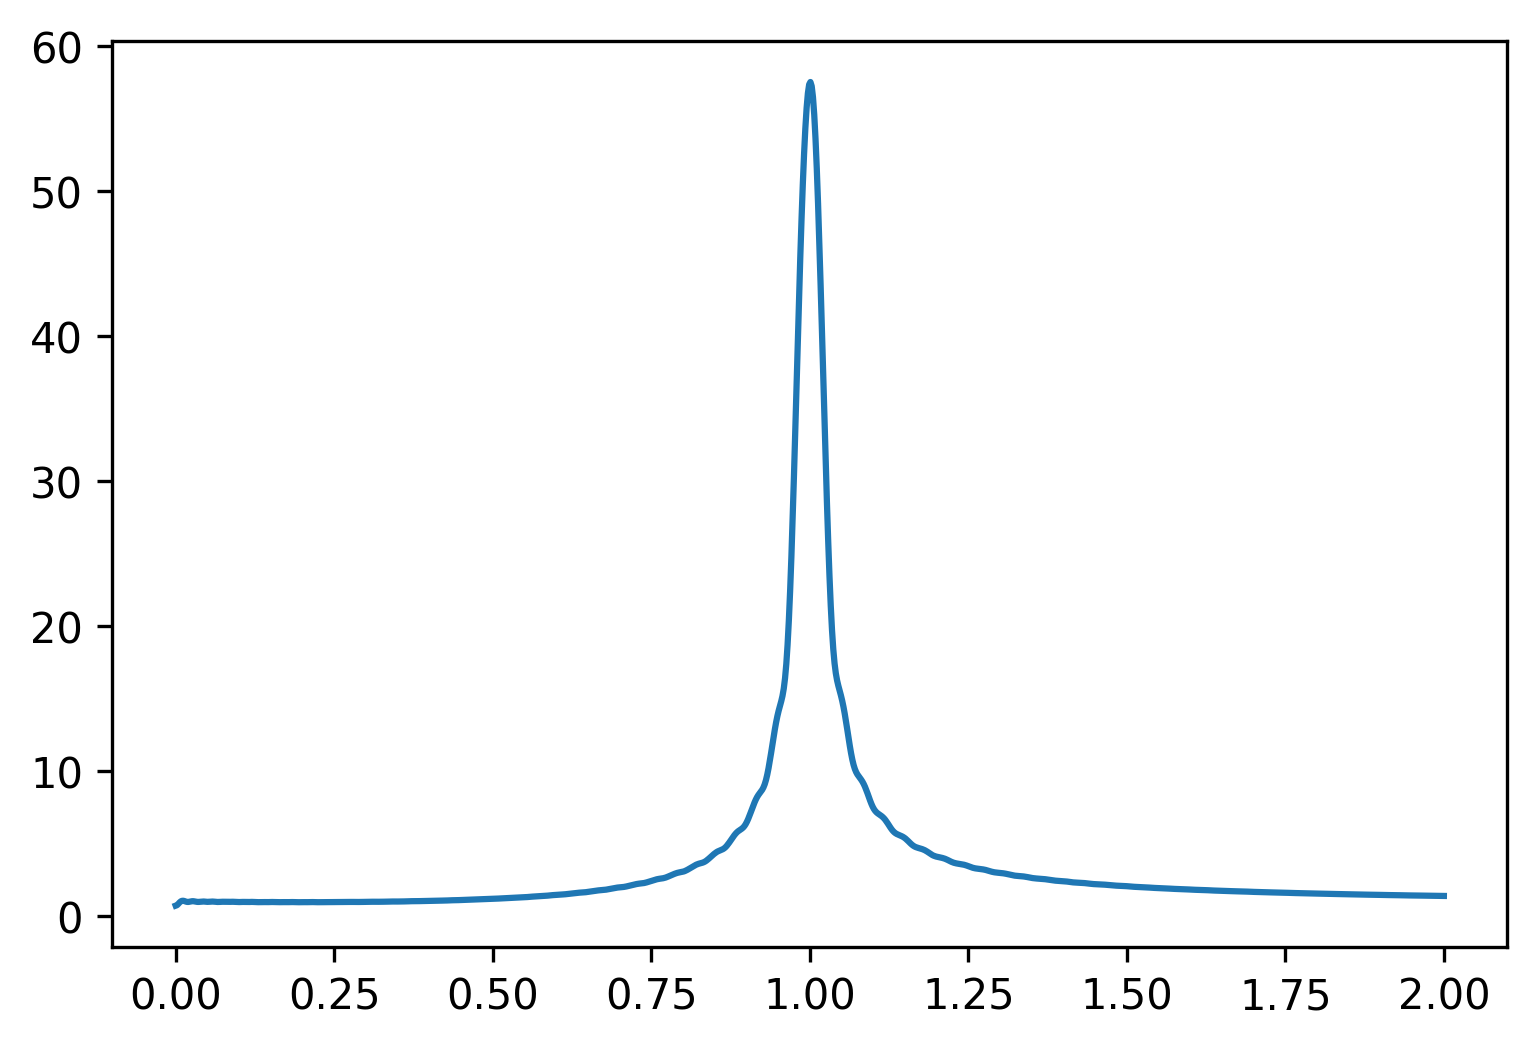

In [3]:
n  = 1000
x  = np.empty((n,n,2))
ws = np.linspace(0,2,n)

# get the position values for each value of w
for i,w in enumerate(ws):
    x[i,:,:] = odeint(F, x_0, t, args = (k, m, F_0, w))

# calculate the rms for each w
rms = np.sqrt(np.sum(x[:,:,0]**2, axis = 1)/n)

plt.plot(ws, rms)
plt.show()